In [1]:
import torch
torch.cuda.empty_cache()

In [2]:
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from sklearn.metrics import classification_report

# Path to the saved fine-tuned model
model_path = "fine_tuned_roberta_model"

# Load the fine-tuned model and tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_path)
model = AutoModelForSequenceClassification.from_pretrained(model_path)

# Define the mapping of label IDs to label names
id2label = {0: "Anxiety", 1: "Bipolar", 2: "Depression", 3: "Normal", 4: "Personality disorder", 5: "Stress"}

# Function for classifying text
def classify_text(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True)
    outputs = model(**inputs)
    predicted_label_id = torch.argmax(outputs.logits, axis=1).item()
    return id2label[predicted_label_id]

# Prompt
example_text = "I'm feeling very anxious and scared."
predicted_label = classify_text(example_text)
print(f"\nExample Text: {example_text}")
print(f"Predicted Label: {predicted_label}")

# Path to the test dataset
test_file_path = "MentalHealth_TestSet.csv"

# Load the test dataset
test_df = pd.read_csv(test_file_path)

# Preprocess dataset
test_df['statement'] = test_df['statement'].fillna("")

# Add a column for predicted labels
test_df['Predicted Label'] = test_df['statement'].apply(classify_text)

# Save the predictions to a CSV file
output_file = "TestDatasetPredictions.csv"
test_df.to_csv(output_file, index=False)
print(f"\nTest dataset predictions saved to {output_file}")

/home/fall2023/pg2360/miniconda3/envs/mental_health_nlp/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm



Example Text: I'm feeling very anxious and scared.
Predicted Label: Anxiety

Test dataset predictions saved to TestDatasetPredictions.csv



Count of each predicted label:
Depression: 18556
Normal: 7098
Stress: 1073
Personality disorder: 451
Anxiety: 408
Bipolar: 389

Visualization saved as Predicted_Label_Counts.png


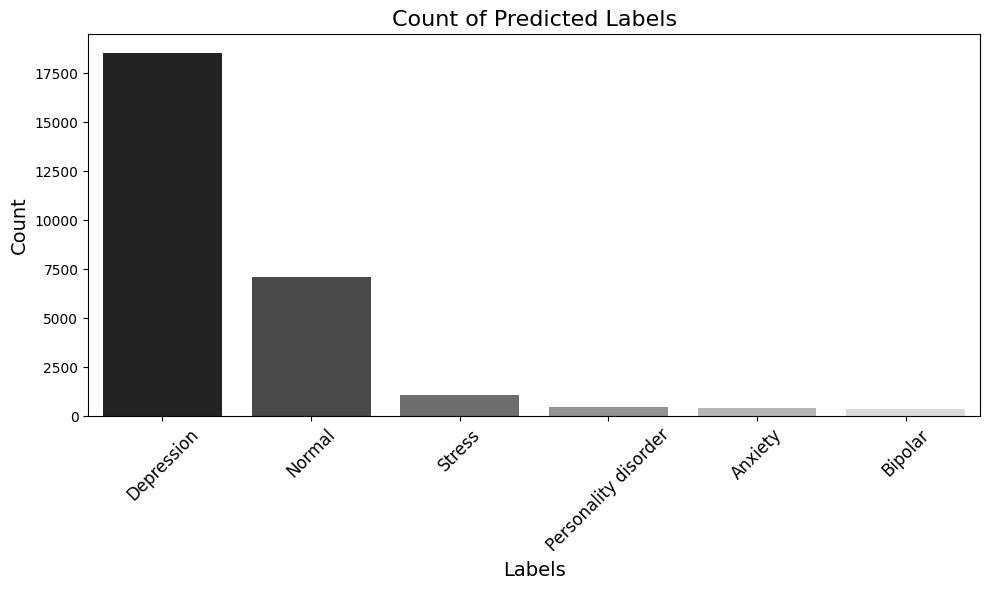

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Load the predictions dataset
predictions_file = "TestDatasetPredictions.csv"
predictions_df = pd.read_csv(predictions_file)

if 'Predicted Label' not in predictions_df.columns:
    raise ValueError("The predictions dataset must contain a 'Predicted Label' column.")

# Count the occurrences of each label
label_counts = predictions_df['Predicted Label'].value_counts()

# Display the counts
print("\nCount of each predicted label:")
for label, count in label_counts.items():
    print(f"{label}: {count}")

# Plot the counts
plt.figure(figsize=(10, 6))
sns.barplot(x=label_counts.index, y=label_counts.values, palette="gray")
plt.title("Count of Predicted Labels", fontsize=16)
plt.xlabel("Labels", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()

# Save the plot
plot_file = "Predicted_Label_Counts.png"
plt.savefig(plot_file)
print(f"\nVisualization saved as {plot_file}")
plt.show()